<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [169]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [170]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166


In [171]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[1]
mydataset


df = pd.read_csv(mydataset)

True


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [173]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [174]:
df.query("`Country/Region` == 'Japan'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
137,NaN,Japan,36.204824,138.252924,2020-01-22,2,0,0,2,Western Pacific
398,NaN,Japan,36.204824,138.252924,2020-01-23,2,0,0,2,Western Pacific
659,NaN,Japan,36.204824,138.252924,2020-01-24,2,0,0,2,Western Pacific
920,NaN,Japan,36.204824,138.252924,2020-01-25,2,0,0,2,Western Pacific
1181,NaN,Japan,36.204824,138.252924,2020-01-26,4,0,1,3,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47900,NaN,Japan,36.204824,138.252924,2020-07-23,28114,992,20878,6244,Western Pacific
48161,NaN,Japan,36.204824,138.252924,2020-07-24,28883,994,21173,6716,Western Pacific
48422,NaN,Japan,36.204824,138.252924,2020-07-25,29684,996,21464,7224,Western Pacific
48683,NaN,Japan,36.204824,138.252924,2020-07-26,30548,998,21606,7944,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [175]:
df["Date"] = pd.to_datetime(df["Date"])

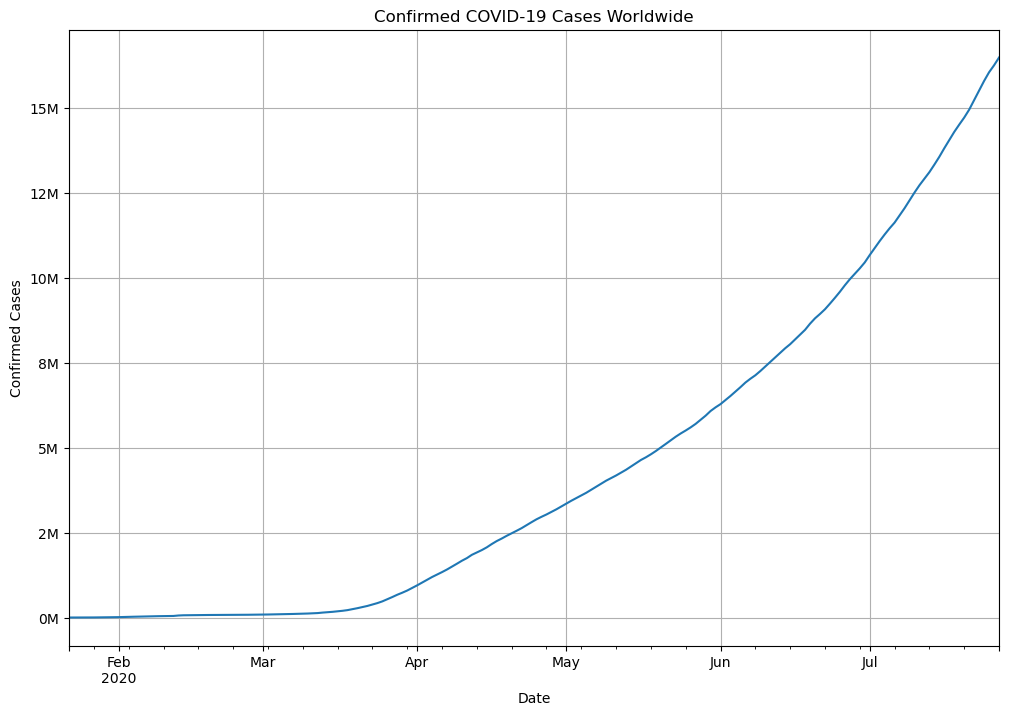

In [176]:
df.groupby("Date")["Confirmed"].sum().plot(kind="line", figsize=(12, 8))
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1e6:.0f}M')
)
plt.title("Confirmed COVID-19 Cases Worldwide")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()



2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

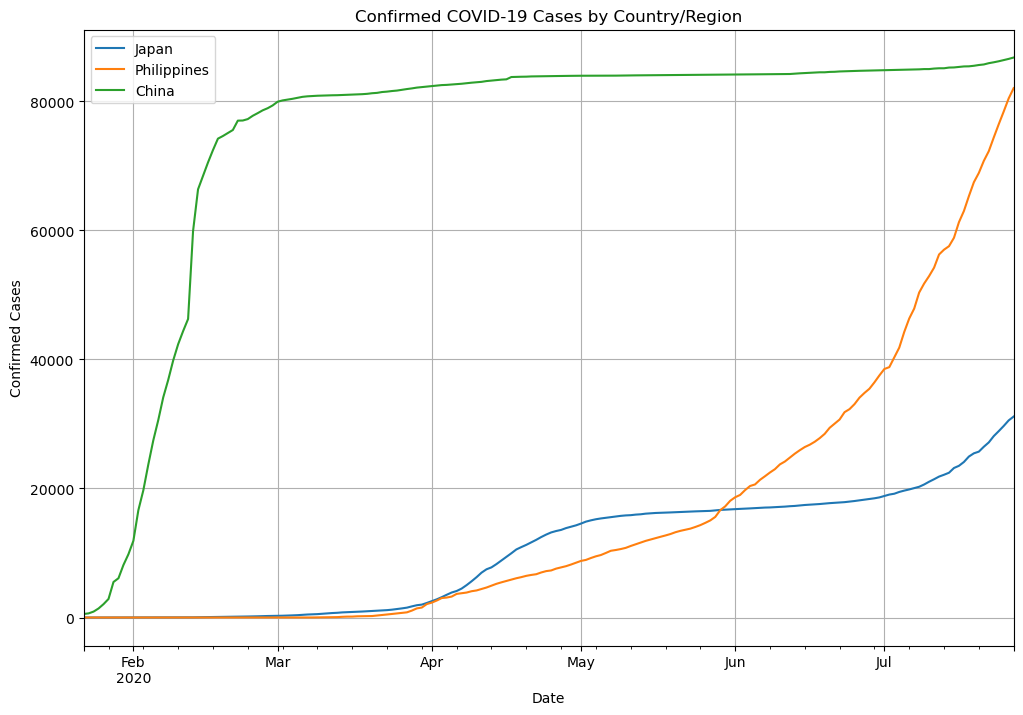

In [177]:
countries = ["Japan", "Philippines", "China"]

for country in countries:
    country_data = df[df["Country/Region"] == country]
    country_data.groupby("Date")["Confirmed"].sum().plot(kind="line", figsize=(12, 8), label=country)

plt.title("Confirmed COVID-19 Cases by Country/Region")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.legend()
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

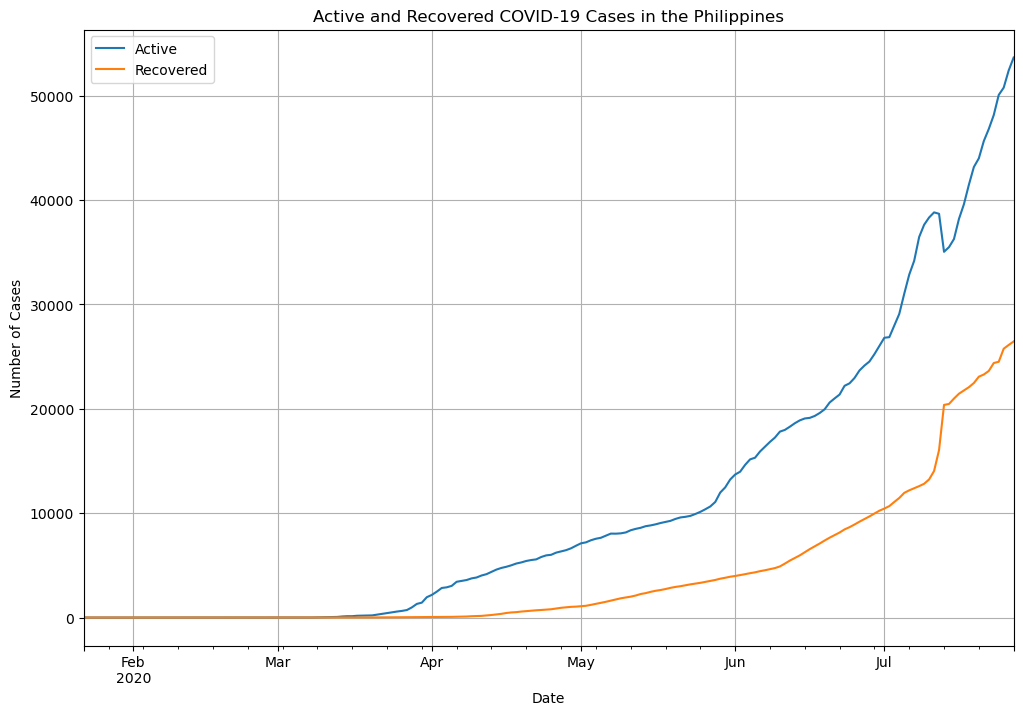

In [178]:
ph_cases = df.query("`Country/Region` == 'Philippines'").groupby("Date")[["Active", "Recovered"]].sum()

ph_cases.plot(kind="line", figsize=(12, 8))
plt.title("Active and Recovered COVID-19 Cases in the Philippines")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

In [179]:
lastest_datedf = df[df['Date'] == df['Date'].max()]
lastest_datedf.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)

Country/Region
US                       4290259
Brazil                   2442375
India                    1480073
Russia                    816680
South Africa              452529
                          ...   
Dominica                      18
Saint Kitts and Nevis         17
Greenland                     14
Holy See                      12
Western Sahara                10
Name: Confirmed, Length: 187, dtype: int64

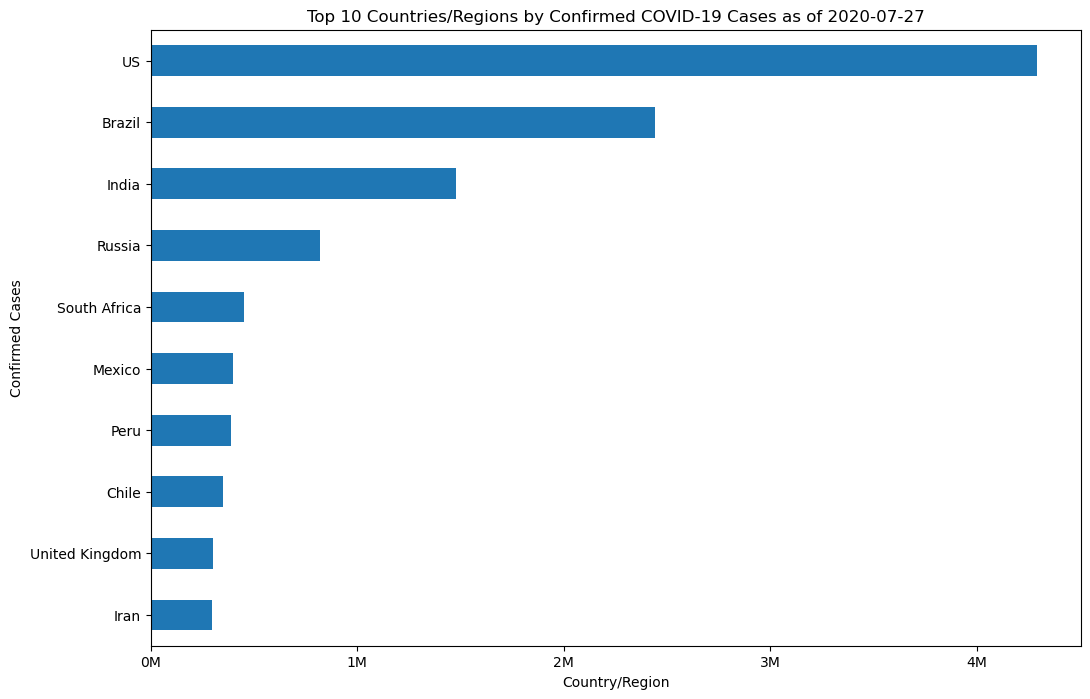

In [180]:
lastest_datedf.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(12, 8))

plt.title("Top 10 Countries/Regions by Confirmed COVID-19 Cases as of " + str(lastest_datedf['Date'].max().date()))
plt.xlabel("Country/Region")
plt.ylabel("Confirmed Cases")

plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1e6:.0f}M')
)

plt.gca().invert_yaxis()
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

In [181]:
lastest_datedf.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False)

WHO Region
Americas                 8839286
Europe                   3299523
South-East Asia          1835297
Eastern Mediterranean    1490744
Africa                    723207
Western Pacific           292428
Name: Confirmed, dtype: int64

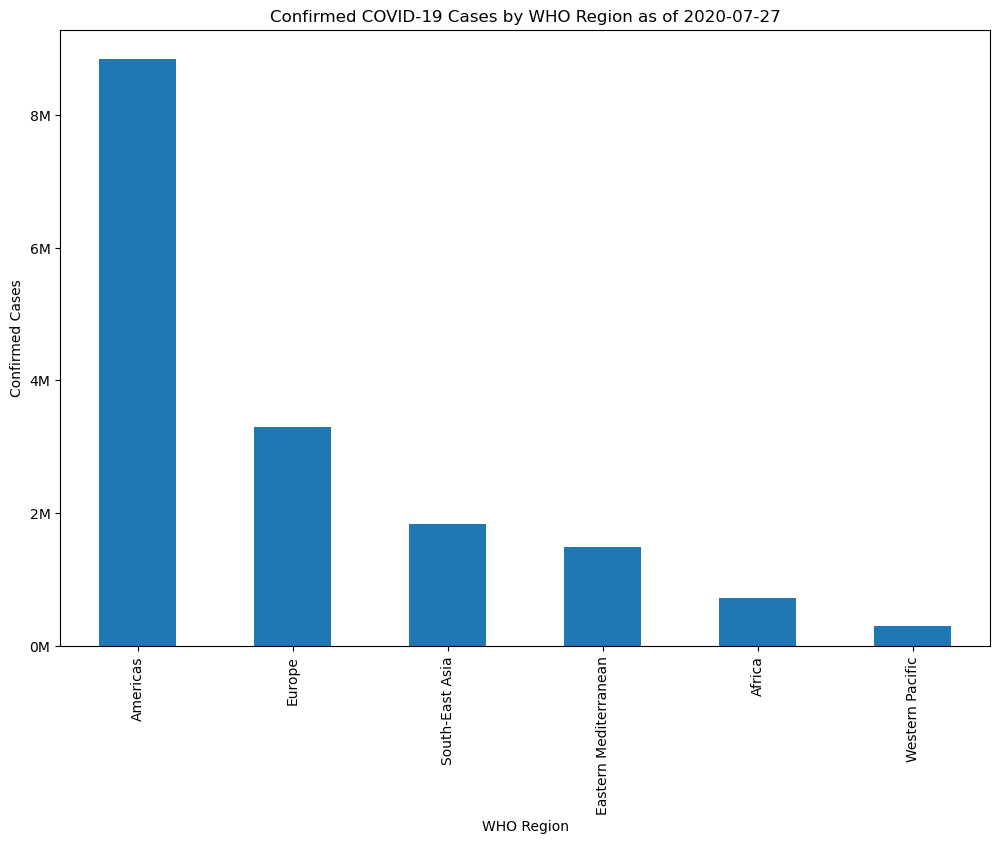

In [182]:
lastest_datedf.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12, 8))

plt.title("Confirmed COVID-19 Cases by WHO Region as of " + str(lastest_datedf['Date'].max().date()))
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases")

plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x/1e6:.0f}M')
)

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [183]:
latest_cases = lastest_datedf.groupby(["Lat", "Long", "WHO Region", "Country/Region"])["Confirmed"].sum().reset_index()  # may adjust the preferred date using ".query()"

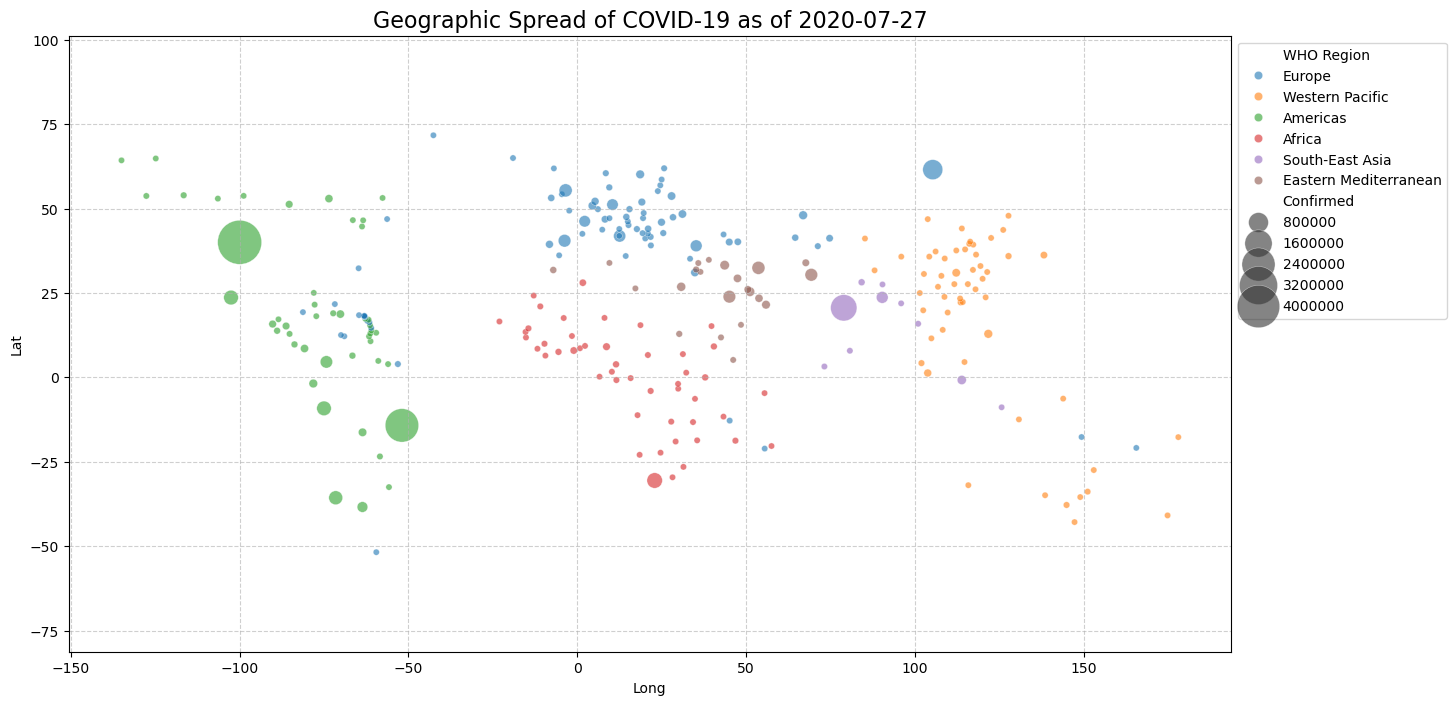

In [184]:
plt.figure(figsize=(15, 8))

sns.scatterplot(
    data=latest_cases,
    x='Long', y='Lat',
    size='Confirmed', sizes=(20, 1000),
    hue='WHO Region', alpha=0.6
)

plt.title('Geographic Spread of COVID-19 as of ' + str(lastest_datedf['Date'].max().date()), fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.axis('Equal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

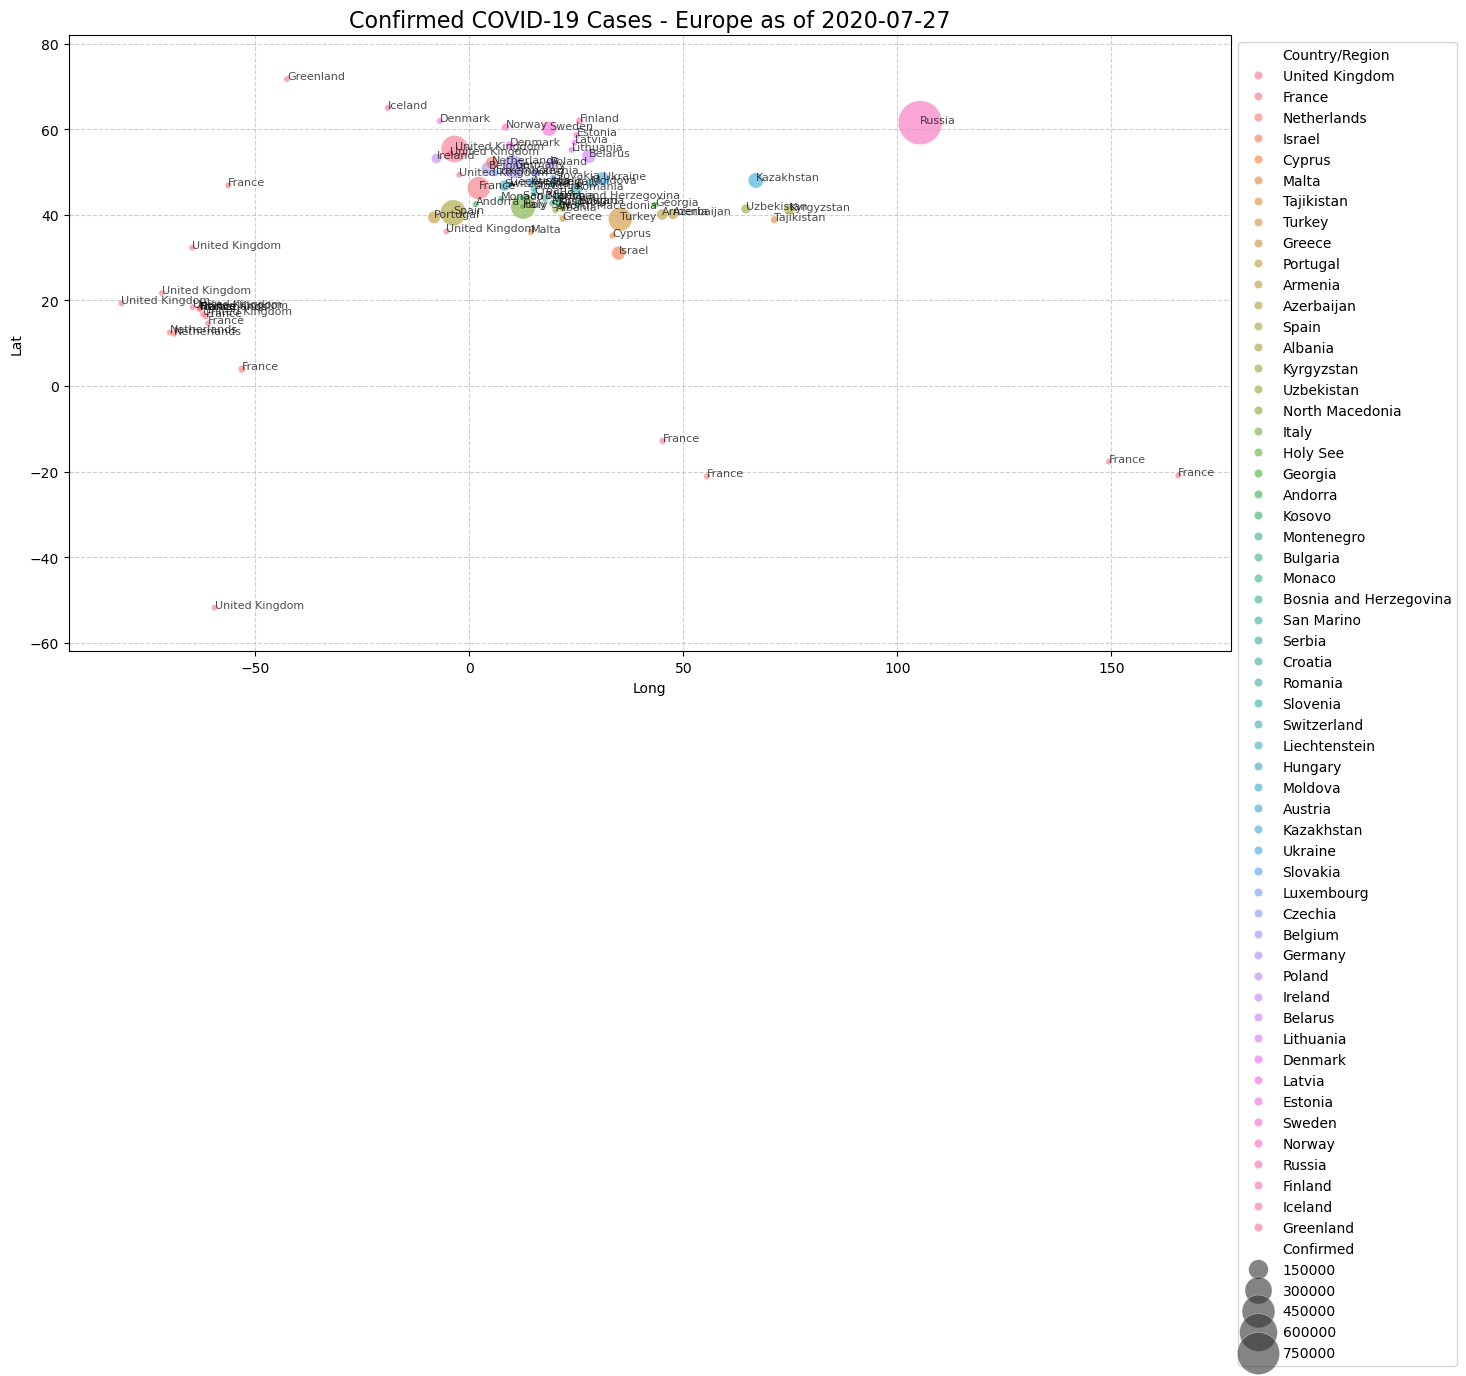

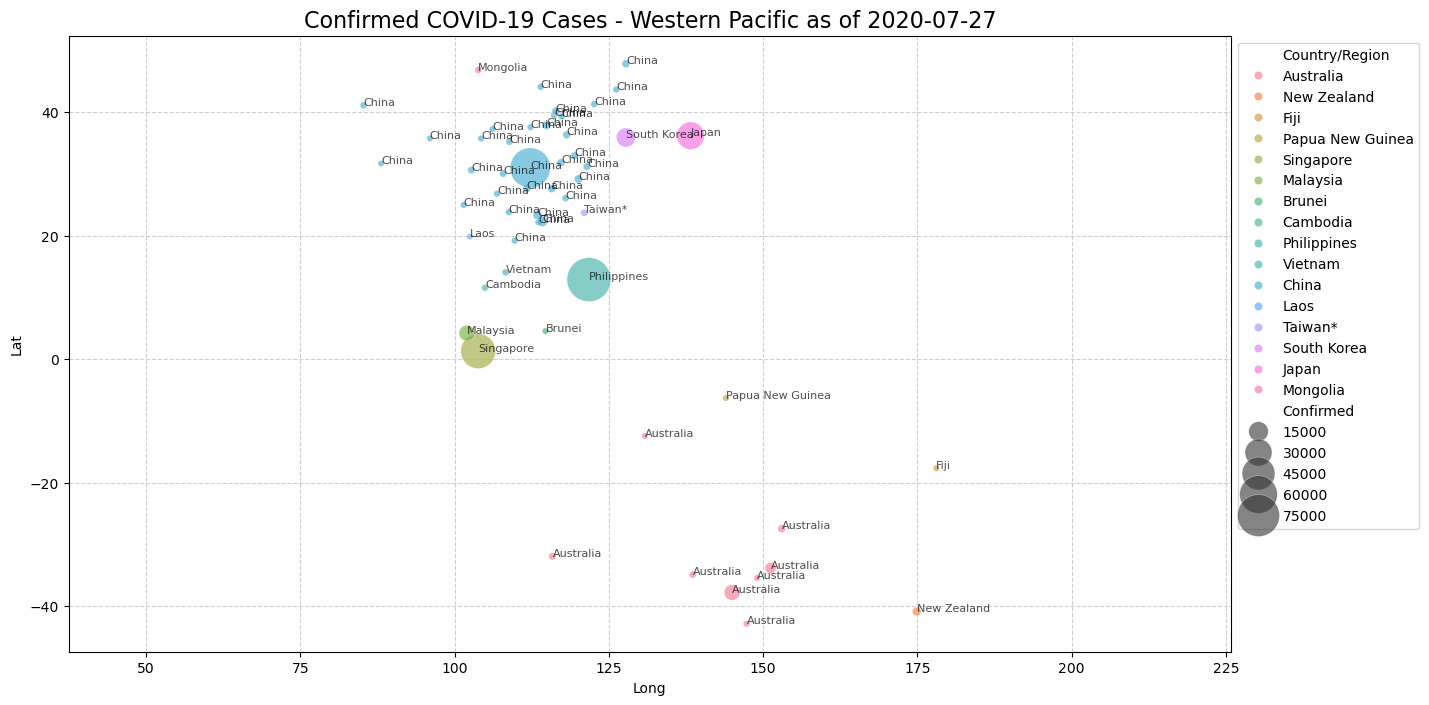

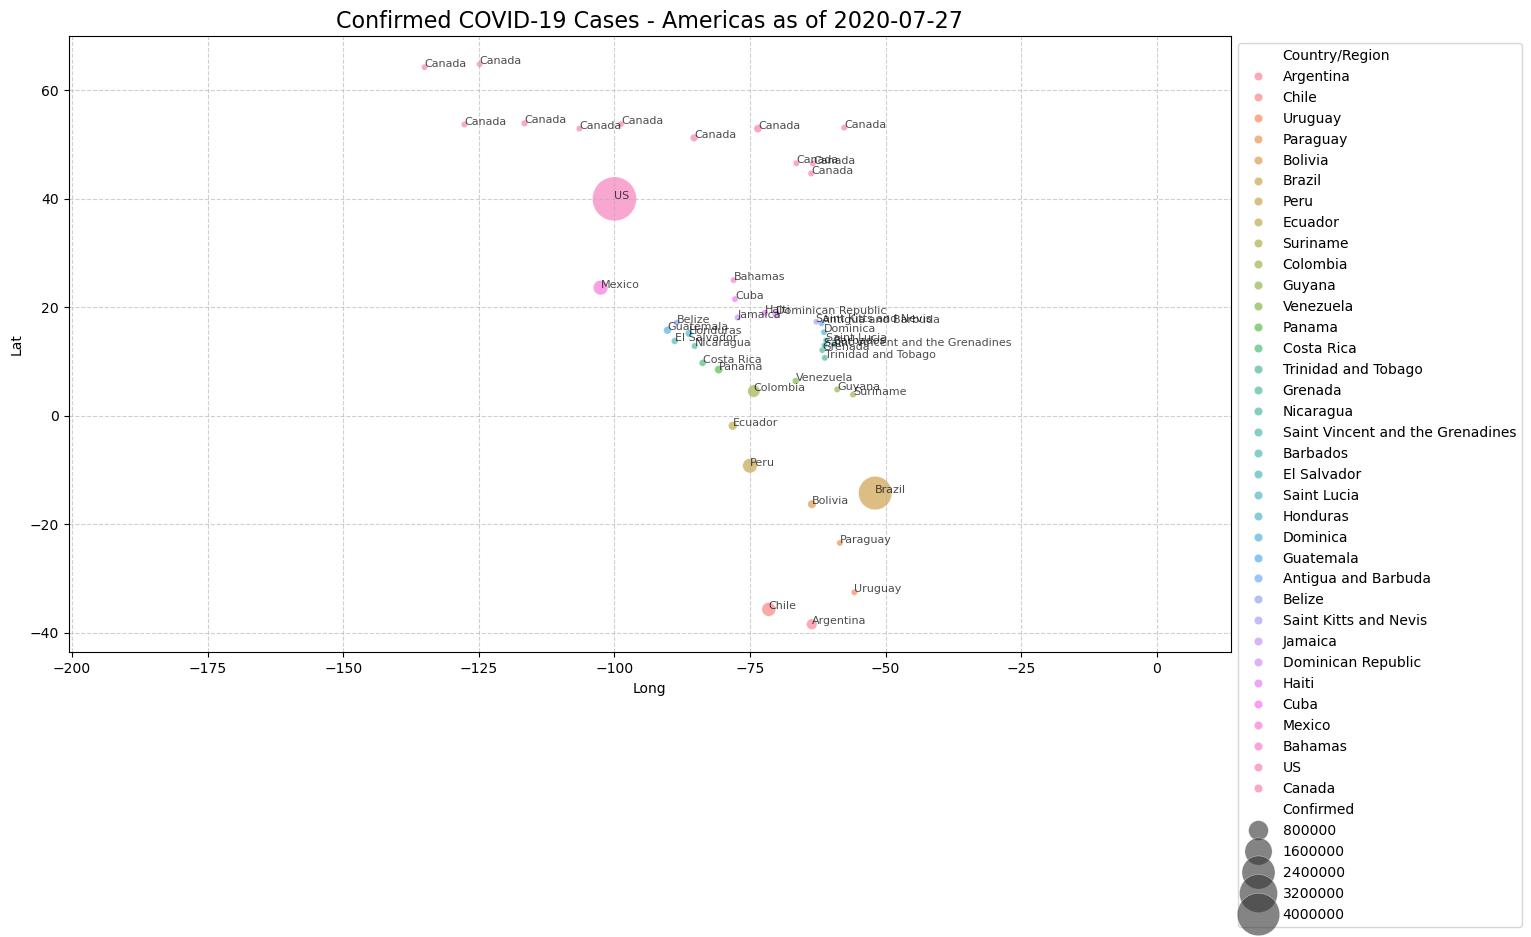

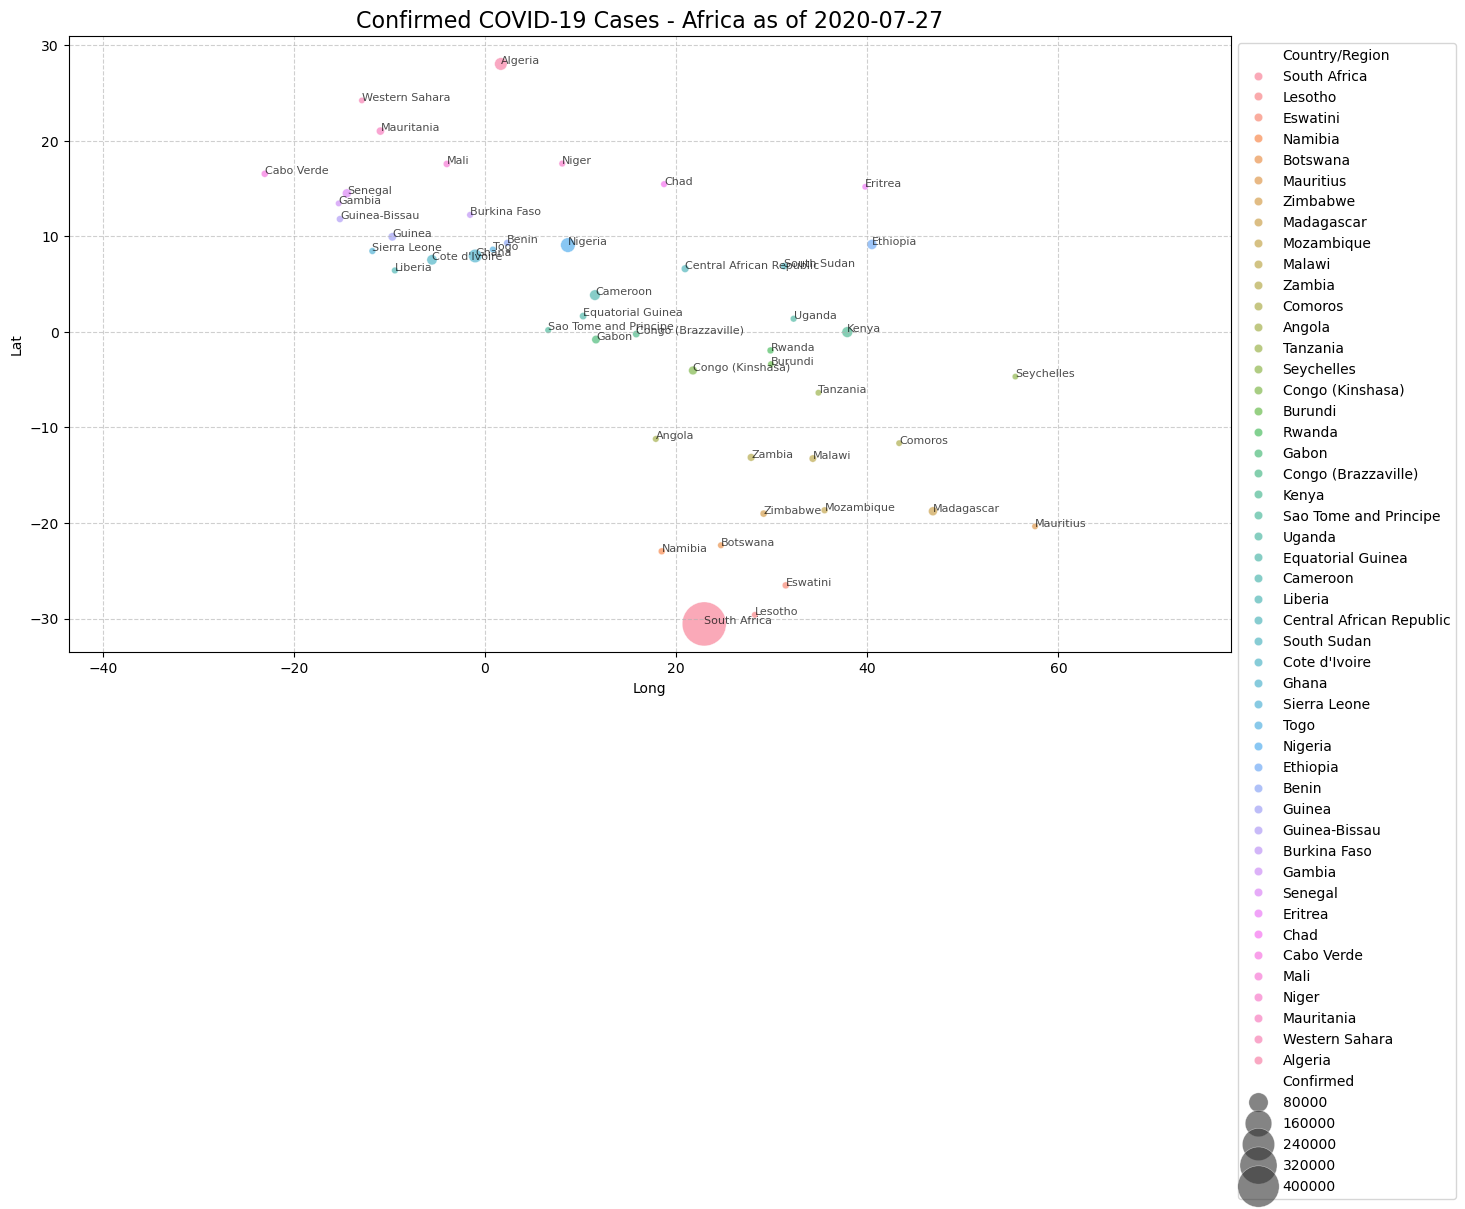

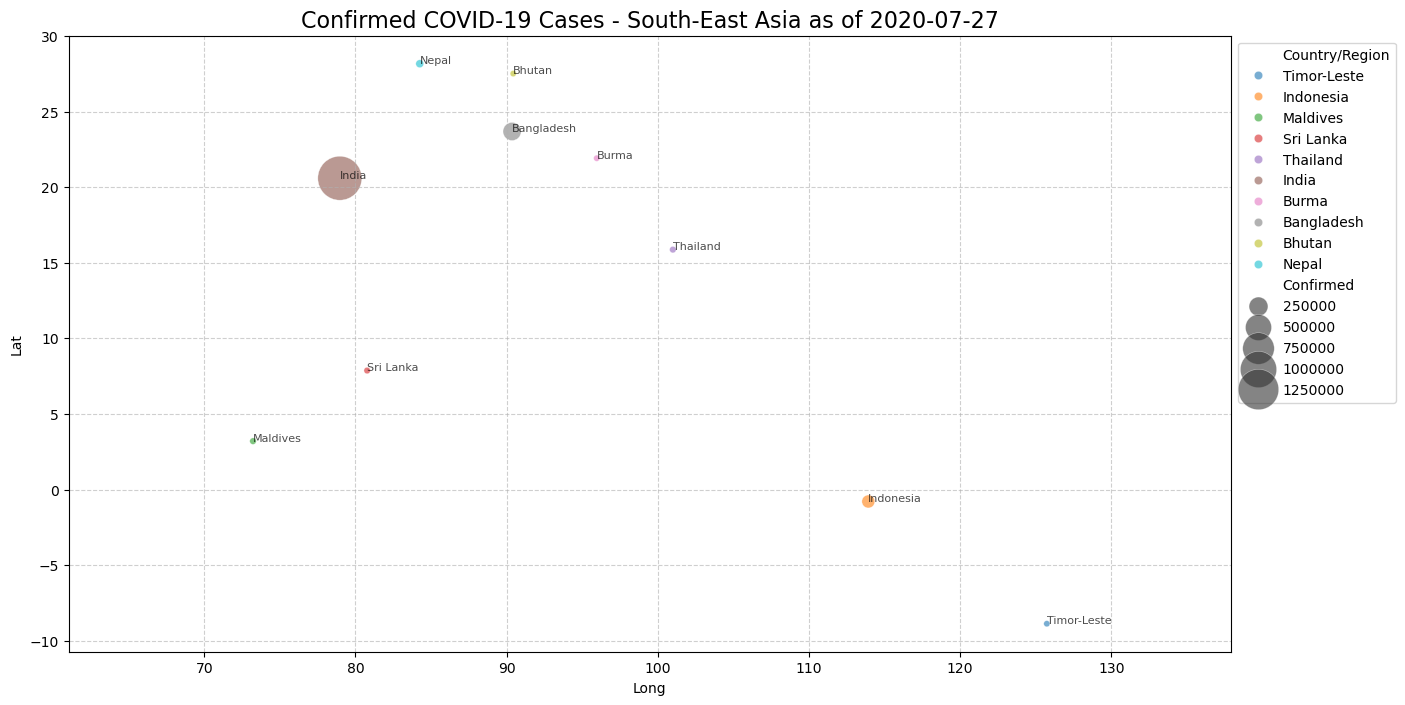

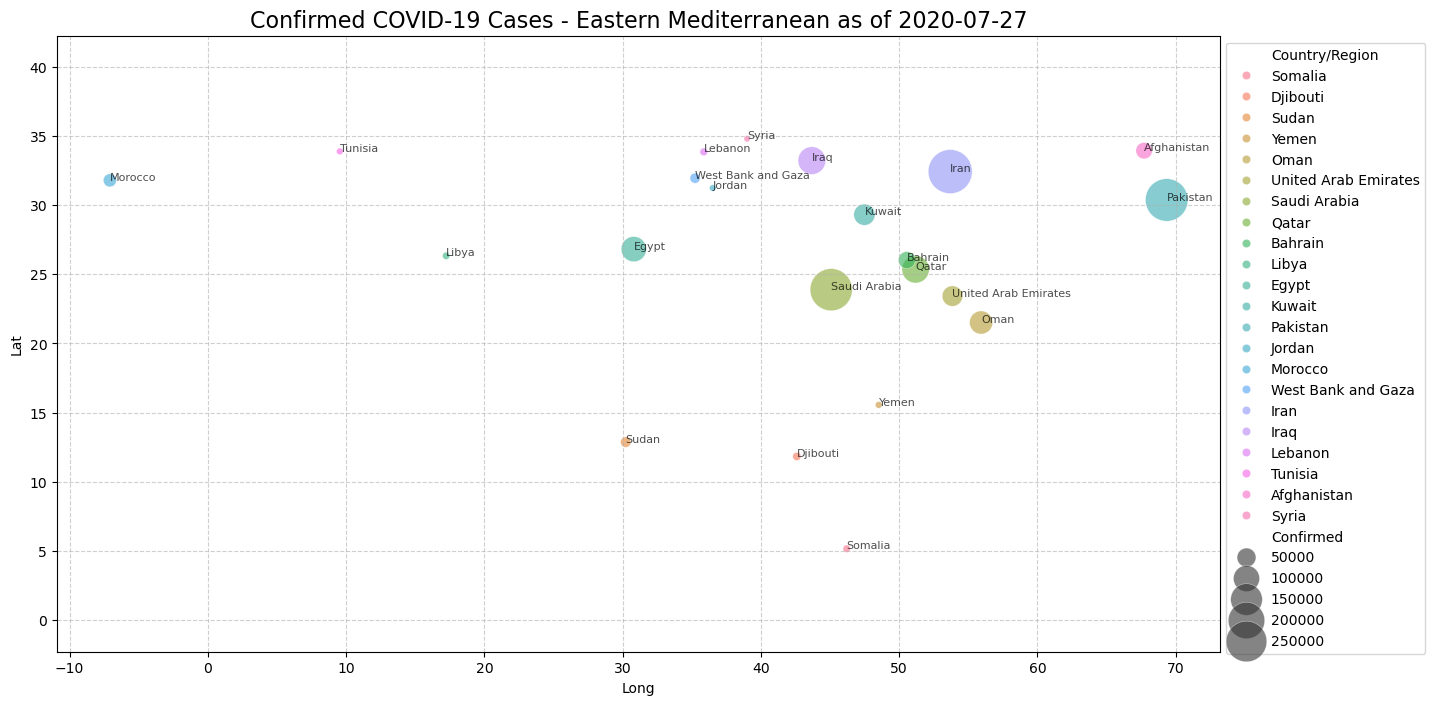

In [185]:
for region in latest_cases["WHO Region"].unique():
    region_cases = latest_cases[latest_cases["WHO Region"] == region]

    plt.figure(figsize=(15, 8))

    sns.scatterplot(
        data=region_cases,
        x='Long', y='Lat',
        size='Confirmed', sizes=(20, 1000),
        hue='Country/Region',
        alpha=0.6
    )

    # Add labels to the dots (optional)
    for _, row in region_cases.iterrows():
        plt.text(
            row["Long"],
            row["Lat"],
            row["Country/Region"],
            fontsize=8,
            alpha=0.7
        )

    plt.title(f"Confirmed COVID-19 Cases - {region} as of " + str(lastest_datedf['Date'].max().date()), fontsize=16)
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.axis('Equal')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()